In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
import cPickle as pk
import matplotlib.pyplot as plt
import matplotlib as mpl
#import seaborn as sns
import datetime as dt
import urllib2
import urllib

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
handle=open('../data/Kenya.pickle','r')
df2=pk.load(handle)
handle.close()

In [5]:
df2.shape

(98099, 46)

In [6]:
df2.drop_duplicates(subset=['id','name','funded_date','status','texts.en'],inplace=True)

In [7]:
df2.shape

(92037, 46)

In [8]:
df2.name[0:5]

0            Victor
57          Francis
78          Maureen
81            Agnes
152    Reuben Mwilu
Name: name, dtype: object

In [9]:
index1=range(0,len(df2['name']))

In [10]:
df2.columns

Index([                     u'activity',                 u'basket_amount',
            u'bonus_credit_eligibility',                     u'borrowers',
                             u'country',                  u'country_code',
       u'currency_exchange_loss_amount',                    u'delinquent',
                         u'description',                 u'funded_amount',
                         u'funded_date',                     u'geo.level',
                           u'geo.pairs',                      u'geo.type',
                                  u'id',                     u'languages',
                        u'lender_count',                   u'loan_amount',
                            u'location',                          u'name',
                                 u'obs',                   u'paid_amount',
                           u'paid_date',                    u'partner_id',
                            u'payments',       u'planned_expiration_date',
                         

In [11]:
df2.reset_index(index1,inplace=True)

In [12]:
df2.status.value_counts()

paid                62122
in_repayment        21403
defaulted            3609
expired              2789
inactive_expired      966
refunded              410
fundraising           361
inactive              142
deleted               141
funded                 67
issue                  25
                        2
Name: status, dtype: int64

In [13]:
df2a = df2[df2.funded_amount>0]

In [14]:
def mktime(x):
    try:
        tym=dt.datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ")
        return tym
    except:
        return np.nan

In [15]:
def getyear(x):
    try:
        yr=np.int(x.year)
        return yr
    except:
        return np.nan

In [16]:
fun_dat=df2a['funded_date'].apply(mktime)
df2a.loc[:,'funded_datetime']=fun_dat

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
fun_year=df2a['funded_datetime'].apply(getyear)

In [18]:
df2a.loc[:,'funded_year']=fun_year

In [19]:
df2b=df2a[(df2a.funded_year.isnull()==False)&(df2a.funded_year!=2016.0)]

In [133]:
df2c=df2b[((df2b.status=='paid')|(df2b.status=='defaulted'))&((df2b.prop_female==0)|(df2b.prop_female==1))]

In [134]:
df2c.prop_female=df2c.prop_female.astype(int, inplace=True)
df2c.prop_female=df2c.prop_female.astype(str, inplace=True)
type(df2c.prop_female.iloc[0])

str

In [135]:
default_sector=df2c.groupby(['status','sector','prop_female']).size() #.unstack('status').fillna(0)
default_sector

status     sector          prop_female
defaulted  Agriculture     0                456
                           1                855
           Arts            0                  4
                           1                 51
           Clothing        0                 57
                           1                170
           Construction    0                 23
                           1                 16
           Education       0                 15
                           1                 20
           Entertainment   0                  8
           Food            0                152
                           1                399
           Health          0                 45
                           1                 24
           Housing         0                  2
                           1                 16
           Manufacturing   0                 26
                           1                  5
           Personal Use    0                  2
 

In [136]:
default_sector=default_sector.unstack('status').fillna(0)
default_sector

status                      defaulted     paid
sector         prop_female                    
Agriculture    0                456.0   6905.0
               1                855.0   8798.0
Arts           0                  4.0     68.0
               1                 51.0    207.0
Clothing       0                 57.0    807.0
               1                170.0   3840.0
Construction   0                 23.0    815.0
               1                 16.0    353.0
Education      0                 15.0    197.0
               1                 20.0    532.0
Entertainment  0                  8.0     74.0
               1                  0.0     25.0
Food           0                152.0   2913.0
               1                399.0  12159.0
Health         0                 45.0    163.0
               1                 24.0    251.0
Housing        0                  2.0    148.0
               1                 16.0    402.0
Manufacturing  0                 26.0    482.0
               1                  5.0    101.0
Personal Use   0                  2.0    249.0
               1                  9.0    522.0
Retail         0                155.0   4015.0
               1                243.0   6858.0
Services       0                112.0   2120.0
               1                139.0   3622.0
Transportation 0                 39.0   1935.0
               1                 10.0    302.0
Wholesale      0                  5.0     55.0
               1                  2.0     35.0

In [138]:
default_sector=default_sector.unstack('prop_female')
default_sector
#default_sector=default_sector.columns.map(flattenHierarchicalCol)
#default_sector

status         defaulted           paid         
prop_female            0      1       0        1
sector                                          
Agriculture        456.0  855.0  6905.0   8798.0
Arts                 4.0   51.0    68.0    207.0
Clothing            57.0  170.0   807.0   3840.0
Construction        23.0   16.0   815.0    353.0
Education           15.0   20.0   197.0    532.0
Entertainment        8.0    0.0    74.0     25.0
Food               152.0  399.0  2913.0  12159.0
Health              45.0   24.0   163.0    251.0
Housing              2.0   16.0   148.0    402.0
Manufacturing       26.0    5.0   482.0    101.0
Personal Use         2.0    9.0   249.0    522.0
Retail             155.0  243.0  4015.0   6858.0
Services           112.0  139.0  2120.0   3622.0
Transportation      39.0   10.0  1935.0    302.0
Wholesale            5.0    2.0    55.0     35.0

In [ ]:
def flattenHierarchicalCol(col,sep = '_'):
    if not type(col) is tuple:
        return col
    else:
        new_col = ''
        for leveli,level in enumerate(col):
            if not level == '':
                if not leveli == 0:
                    new_col += sep
                new_col += level
        return new_col

In [139]:
default_sector.columns=default_sector.columns.map(flattenHierarchicalCol)
default_sector

,defaulted_0,defaulted_1,paid_0,paid_1
sector,,,,
Agriculture,456.0,855.0,6905.0,8798.0
Arts,4.0,51.0,68.0,207.0
Clothing,57.0,170.0,807.0,3840.0
Construction,23.0,16.0,815.0,353.0
Education,15.0,20.0,197.0,532.0
Entertainment,8.0,0.0,74.0,25.0
Food,152.0,399.0,2913.0,12159.0
Health,45.0,24.0,163.0,251.0
Housing,2.0,16.0,148.0,402.0


In [143]:
default_sector.loc[:,'n']=default_sector.sum(axis=1)

In [144]:
default_sector

,defaulted_0,defaulted_1,paid_0,paid_1,n
sector,,,,,
Agriculture,456.0,855.0,6905.0,8798.0,17014.0
Arts,4.0,51.0,68.0,207.0,330.0
Clothing,57.0,170.0,807.0,3840.0,4874.0
Construction,23.0,16.0,815.0,353.0,1207.0
Education,15.0,20.0,197.0,532.0,764.0
Entertainment,8.0,0.0,74.0,25.0,107.0
Food,152.0,399.0,2913.0,12159.0,15623.0
Health,45.0,24.0,163.0,251.0,483.0
Housing,2.0,16.0,148.0,402.0,568.0


In [148]:
default_sector.loc[:,'def_rate_female']=default_sector.defaulted_1/(default_sector.defaulted_1 + default_sector.paid_1)
default_sector.loc[:,'def_rate_male']=default_sector.defaulted_0/(default_sector.defaulted_0 + default_sector.paid_0)

In [152]:
default_sector

,defaulted_0,defaulted_1,paid_0,paid_1,n,def_rate_female,def_rate_male
sector,,,,,,,
Agriculture,456.0,855.0,6905.0,8798.0,17014.0,0.088574,0.061948
Arts,4.0,51.0,68.0,207.0,330.0,0.197674,0.055556
Clothing,57.0,170.0,807.0,3840.0,4874.0,0.042394,0.065972
Construction,23.0,16.0,815.0,353.0,1207.0,0.043360,0.027446
Education,15.0,20.0,197.0,532.0,764.0,0.036232,0.070755
Entertainment,8.0,0.0,74.0,25.0,107.0,0.000000,0.097561
Food,152.0,399.0,2913.0,12159.0,15623.0,0.031773,0.049592
Health,45.0,24.0,163.0,251.0,483.0,0.087273,0.216346
Housing,2.0,16.0,148.0,402.0,568.0,0.038278,0.013333


In [154]:
default_sector.index

Index([u'Agriculture', u'Arts', u'Clothing', u'Construction', u'Education',
       u'Entertainment', u'Food', u'Health', u'Housing', u'Manufacturing',
       u'Personal Use', u'Retail', u'Services', u'Transportation',
       u'Wholesale'],
      dtype='object', name=u'sector')

In [173]:
locs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

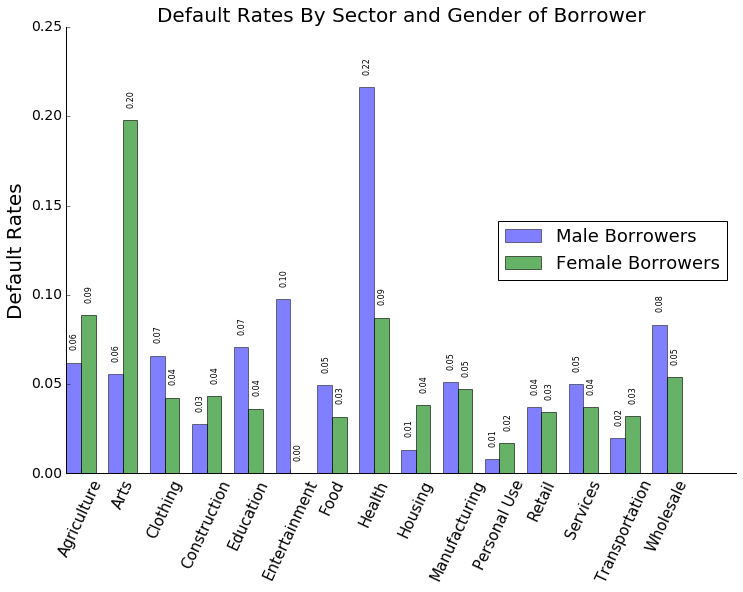

In [270]:
fig=plt.figure(figsize=(12,8),facecolor='white')#open a figure
ax=fig.add_subplot(1,1,1)
width=0.35

N= len(default_sector.index)
locs=np.arange(N)
male=ax.bar(locs,default_sector.def_rate_male,width=width,color='blue',alpha=0.5)
female=ax.bar(locs+width,default_sector.def_rate_female,width=width,color='green',alpha=0.6)

ax.legend((male[0],female[0]),('Male Borrowers','Female Borrowers'),loc='center right',prop={'size':18})
ax.tick_params(labeltop='off', labelright='off')
ax.set_ylabel('Default Rates',fontsize=20)
ax.set_title('Default Rates By Sector and Gender of Borrower',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(N)+width)
ax.set_xticklabels(default_sector.index,rotation=65,fontsize=15)
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 

heights=list(default_sector.def_rate_male)+list(default_sector.def_rate_female)

bar_labelsm=[str("%.2f" % round(i,2))for i in list(default_sector.def_rate_male)]
bar_labelsf=[str("%.2f" % round(i,2))for i in list(default_sector.def_rate_female)]
bar_labels=bar_labelsm + bar_labelsf

rects=ax.patches

for rect,label in zip(rects,bar_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/1.8, height + 0.007, label, ha='center', va='bottom',fontsize=8,rotation=90)


plt.show()

In [273]:
df2c.columns

Index([                        u'index',                      u'activity',
                       u'basket_amount',      u'bonus_credit_eligibility',
                           u'borrowers',                       u'country',
                        u'country_code', u'currency_exchange_loss_amount',
                          u'delinquent',                   u'description',
                       u'funded_amount',                   u'funded_date',
                           u'geo.level',                     u'geo.pairs',
                            u'geo.type',                            u'id',
                           u'languages',                  u'lender_count',
                         u'loan_amount',                      u'location',
                                u'name',                           u'obs',
                         u'paid_amount',                     u'paid_date',
                          u'partner_id',                      u'payments',
             u'planned_ex

In [360]:
len(df2c.town[df2c.status=='default'])

0

In [363]:
len(df2c.name[df2c.status=='default'])

0

#### The above two lines show that there are no non-null location, or name feature values for any of the loans that have defaulted

In [356]:
len(df2c.funded_amount[(df2c.status=='defaulted')&(df2c.funded_amount >1000)])

323

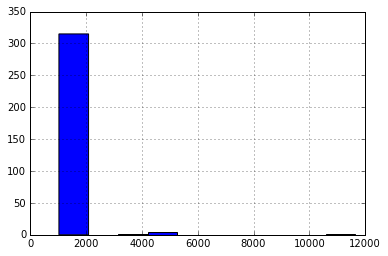

In [357]:
df2c.funded_amount[(df2c.status=='defaulted')&(df2c.funded_amount >1000)].hist()

#### The above plot shows that only a few defaulted loans were for more than $2000

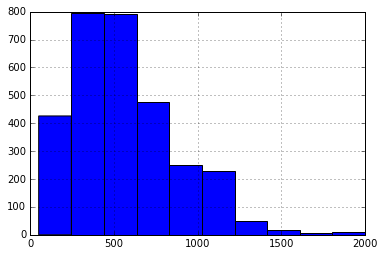

In [359]:
df2c.funded_amount[(df2c.status=='defaulted')&(df2c.funded_amount <=2000)].hist();

In [ ]:
#### Most defaulted loans are quite small, but then, most loans are small too.

In [366]:
df2d=df2c[(df2c.status=='defaulted')&(df2c.funded_amount <=1000)][['activity','sector','loan_amount']].groupby(['sector','activity'],as_index=False).mean()
#df2d

In [367]:
n=df2c[(df2c.status=='defaulted')&(df2c.funded_amount <=1000)][['activity','sector','loan_amount']].groupby(['sector','activity'],as_index=False).size()
n=n.reset_index()
n.rename(columns={0:'n'},inplace=True)
df2d.loc[:,'n']=n.n
#df2d


In [379]:
sum(df2c.loan_amount[df2c.loan_amount==0])

0

In [392]:
x=[1,1,1,1,1,2,3,4,5]
pd.cut(x,3,labels=False)

array([0, 0, 0, 0, 0, 0, 1, 2, 2])

In [384]:
df2c.loan_amount.quantile(np.arange(0.1,1,9))

0.1    175.0
Name: loan_amount, dtype: float64

In [428]:
df2e=df2c[df2c.loan_amount<=1600]
bins=pd.cut(df2e.loan_amount,[0,200,300,400,500,600,800,1600],labels=False)
df2e.loc[:,'bins']=bins.astype(int)

In [429]:
bins.value_counts(sort=False)

0     8893
1    17809
2     9215
3     7252
4     7468
5     5749
6     5475
Name: loan_amount, dtype: int64

In [457]:
df2f=df2e[:][['status','sector','bins']].groupby(['bins','status']).size().unstack('status').reset_index(drop=True)
df2f.loc[:,'n']=df2f.defaulted + df2f.paid
df2f.loc[:,'prop_defaulted']=df2f.defaulted/(df2f.n)
df2f

status,defaulted,paid,n,prop_defaulted
0,368,8525,8893,0.041381
1,515,17294,17809,0.028918
2,299,8916,9215,0.032447
3,421,6831,7252,0.058053
4,355,7113,7468,0.047536
5,513,5236,5749,0.089233
6,563,4912,5475,0.102831


### You can see in the next calculation that, historically, the odds of a default are over three times as great for loans in the highest category (\$800-\$1600), which have a default rate of about one-in-ten, compared to loans in the second category (\$100-\$200).

In [493]:
mindf=min(df2f.prop_defaulted)
maxdf=max(df2f.prop_defaulted)
max_odds_ratio= (maxdf*(1-maxdf))/(mindf*(1-mindf))
max_odds_ratio

3.2852989138717179

In [458]:
df2f.index

RangeIndex(start=0, stop=7, step=1)

<function matplotlib.pyplot.show>

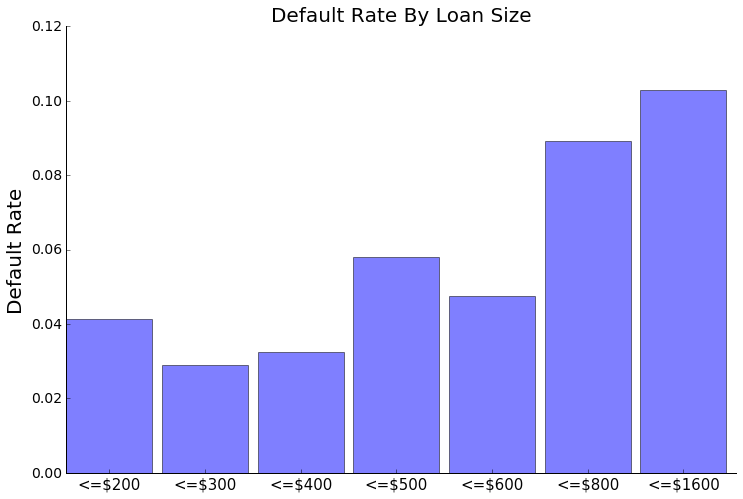

In [459]:
fig=plt.figure(figsize=(12,8),facecolor='white')#open a figure
ax=fig.add_subplot(1,1,1)
width=0.9
N= len(df2f.index)
locs=np.arange(N)
bar=ax.bar(locs,df2f.prop_defaulted,width=width,color='blue',alpha=0.5)
ax.tick_params(labeltop='off', labelright='off')
ax.set_ylabel('Default Rate',fontsize=20)
ax.set_title('Default Rate By Loan Size',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
xlabels=['<=$200','<=$300','<=$400','<=$500','<=$600','<=$800','<=$1600']

ax.set_xticks(np.arange(N)+width/2)
ax.set_xticklabels(xlabels,rotation=0,fontsize=15)
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
plt.show

In [484]:
df2g=df2e[:][['status','sector','prop_female','bins']].groupby(['bins','prop_female','status']).size().unstack(['status','prop_female'])
df2g.columns=df2g.columns.map(flattenHierarchicalCol)
df2g.loc[:,'def_rate_male']=df2g.defaulted_0/(df2g.defaulted_0 + df2g.paid_0)
df2g.loc[:,'def_rate_female']=df2g.defaulted_1/(df2g.defaulted_1 + df2g.paid_1)

df2g

,defaulted_0,paid_0,defaulted_1,paid_1,def_rate_male,def_rate_female
bins,,,,,,
0,89,2379,279,6146,0.036062,0.043424
1,152,5621,363,11673,0.026329,0.030160
2,125,3111,174,5805,0.038628,0.029102
3,151,2514,270,4317,0.056660,0.058862
4,129,2328,226,4785,0.052503,0.045101
5,205,2507,308,2729,0.075590,0.101416
6,234,2444,329,2468,0.087379,0.117626


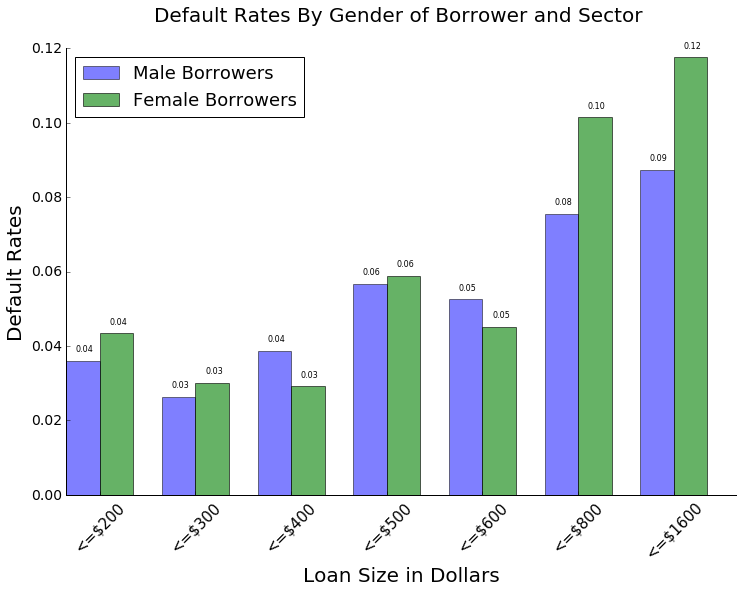

In [494]:
fig=plt.figure(figsize=(12,8),facecolor='white')#open a figure
ax=fig.add_subplot(1,1,1)
width=0.35

N= len(df2g.index)
locs=np.arange(N)
male=ax.bar(locs,df2g.def_rate_male,width=width,color='blue',alpha=0.5)
female=ax.bar(locs+width,df2g.def_rate_female,width=width,color='green',alpha=0.6)

ax.legend((male[0],female[0]),('Male Borrowers','Female Borrowers'),loc='top left',prop={'size':18})
ax.tick_params(labeltop='off', labelright='off')
ax.set_ylabel('Default Rates',fontsize=20)
ax.set_xlabel('Loan Size in Dollars',fontsize=20)
ax.set_title('Default Rates By Gender of Borrower and Sector \n',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(N)+width)
ax.set_xticklabels(['<=$200','<=$300','<=$400','<=$500','<=$600','<=$800','<=$1600'],rotation=45,fontsize=15)

for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 

heights=list(df2g.def_rate_male)+list(df2g.def_rate_female)

bar_labelsm=[str("%.2f" % round(i,2))for i in list(df2g.def_rate_male)]
bar_labelsf=[str("%.2f" % round(i,2))for i in list(df2g.def_rate_female)]
bar_labels=bar_labelsm + bar_labelsf

rects=ax.patches

for rect,label in zip(rects,bar_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/1.8, height + 0.002, label, ha='center', va='bottom',fontsize=8,rotation=0)


plt.show()

In [474]:
a1=np.array(df2g.iloc[:,0:2])
a2=np.array(df2g.iloc[:,2:4])
a3=np.stack((a1,a2))
a3

In [479]:
from scipy import stats as st

In [481]:
test_stat, P,df,expected=st.chi2_contingency(a3,lambda_="log-likelihood")
P

0.0